In [ ]:
import os
import pandas as pd

path = '/content/drive/MyDrive/Colab Notebooks/Coron/station_data' # specify the path to your directory
all_files = [f for f in os.listdir(path) if f.endswith('.xlsx')]

# list to store dataframes
df_list = []

# loop through all the .xls files in the directory
for filename in all_files:
    df = pd.read_excel(os.path.join(path, filename))
    df_list.append(df)

# concatenate all the dataframes in df_list
result = pd.concat(df_list, axis=0, ignore_index=True)

# sort the resulting DataFrame by the "time" column
result.sort_values(by="time", axis=0, ascending=True, inplace=True)


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259776 entries, 78336 to 26207
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time    259776 non-null  datetime64[ns]
 1   gust_o  259776 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 MB


In [ ]:
result.to_csv('/content/drive/MyDrive/Colab Notebooks/Coron/station_data/gust_o_corte.csv',index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coron/station_data/gust_o_corte.csv',parse_dates=["time"])

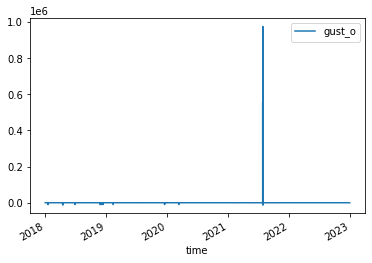

In [ ]:
df.set_index("time").plot();

In [ ]:
import numpy as np
import plotly.express as px


# Create a boolean mask based on the conditions
mask = (df['gust_o'] > 40) | (df['gust_o'] < 0)

# Replace the values in the specified column with NaN where the conditions are True
df['gust_o'] = df['gust_o'].where(~mask, np.nan)


fig = px.line(df, x='time', y="gust_o")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.describe()



,gust_o
count,258772.000000
mean,6.795199
std,3.686422
min,0.030000
25%,3.920000
50%,6.290000
75%,9.210000
max,26.940000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259776 entries, 0 to 259775
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time    259776 non-null  datetime64[ns]
 1   gust_o  258772 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 MB


In [ ]:
#nan number
df['gust_o'].isnull().sum()

1004

In [ ]:
# Identify the duplicate rows
duplicates = df.duplicated(subset=df.columns, keep='first')
duplicates.value_counts()

# Remove the duplicate rows
df = df[~duplicates]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259776 entries, 0 to 259775
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time    259776 non-null  datetime64[ns]
 1   gust_o  258772 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 MB


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Coron/station_data/gust_o_corte.csv',index=False)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/gust_o_corte.csv",parse_dates=["time"])

In [ ]:
df.describe()

,gust_o
count,258772.000000
mean,6.795199
std,3.686422
min,0.030000
25%,3.920000
50%,6.290000
75%,9.210000
max,26.940000


In [ ]:
#nan number
df['gust_o'].isnull().sum()

1004

In [ ]:
df.set_index("time").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259776 entries, 2018-01-01 00:10:00 to 2022-12-31 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   gust_o  258772 non-null  float64
dtypes: float64(1)
memory usage: 4.0 MB


In [17]:
import pandas as pd

df_spd = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/spd_o_corte.csv",parse_dates=["time"])
df_gust = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/gust_o_corte.csv",parse_dates=["time"])
df_dir = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/dir_o_corte.csv",parse_dates=["time"])

In [18]:
df_dir

,time,dir_o
0,2018-01-01 00:10:00,203.0
1,2018-01-01 00:20:00,201.0
2,2018-01-01 00:30:00,204.0
3,2018-01-01 00:40:00,200.0
4,2018-01-01 00:50:00,199.0
...,...,...
259771,2022-12-30 23:20:00,179.0
259772,2022-12-30 23:30:00,177.0
259773,2022-12-30 23:40:00,180.0
259774,2022-12-30 23:50:00,178.0


In [19]:
df_gust

,time,gust_o
0,2018-01-01 00:10:00,8.01
1,2018-01-01 00:20:00,8.18
2,2018-01-01 00:30:00,8.11
3,2018-01-01 00:40:00,6.88
4,2018-01-01 00:50:00,8.23
...,...,...
259771,2022-12-30 23:20:00,21.36
259772,2022-12-30 23:30:00,18.63
259773,2022-12-30 23:40:00,19.26
259774,2022-12-30 23:50:00,21.10


In [20]:
df_spd

,time,spd_o
0,2018-01-01 00:20:00,5.69
1,2018-01-01 00:30:00,5.84
2,2018-01-01 00:40:00,5.06
3,2018-01-01 00:50:00,5.80
4,2018-01-01 01:00:00,5.99
...,...,...
259914,2022-12-30 23:20:00,11.85
259915,2022-12-30 23:30:00,12.84
259916,2022-12-30 23:40:00,11.84
259917,2022-12-30 23:50:00,12.47


In [24]:
df = pd.concat([df_spd.set_index("time"),df_gust.set_index("time"),df_dir.set_index("time")],axis=1)
df

,spd_o,gust_o,dir_o
time,,,
2018-01-01 00:10:00,NaN,8.01,203.0
2018-01-01 00:20:00,5.69,8.18,201.0
2018-01-01 00:30:00,5.84,8.11,204.0
2018-01-01 00:40:00,5.06,6.88,200.0
2018-01-01 00:50:00,5.80,8.23,199.0
...,...,...,...
2022-12-30 23:20:00,11.85,21.36,179.0
2022-12-30 23:30:00,12.84,18.63,177.0
2022-12-30 23:40:00,11.84,19.26,180.0


In [25]:
df.describe()

,spd_o,gust_o,dir_o
count,258916.000000,258772.000000,258774.000000
mean,5.135482,6.795199,119.414990
std,2.830374,3.686422,96.330559
min,0.010000,0.030000,0.000000
25%,2.920000,3.920000,36.000000
50%,4.850000,6.290000,63.000000
75%,7.090000,9.210000,198.000000
max,20.250000,26.940000,360.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260064 entries, 2018-01-01 00:10:00 to 2022-12-31 00:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   spd_o   258916 non-null  float64
 1   gust_o  258772 non-null  float64
 2   dir_o   258774 non-null  float64
dtypes: float64(3)
memory usage: 7.9 MB


In [27]:
df["time"] = df.index
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260064 entries, 2018-01-01 00:10:00 to 2022-12-31 00:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   spd_o   258916 non-null  float64       
 1   gust_o  258772 non-null  float64       
 2   dir_o   258774 non-null  float64       
 3   time    260064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 9.9 MB


In [28]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/cortegada.csv",index=False)

In [ ]:
pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/cortegada.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260064 entries, 0 to 260063
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   spd_o   258916 non-null  float64
 1   gust_o  258772 non-null  float64
 2   dir_o   258774 non-null  float64
 3   time    260064 non-null  object 
dtypes: float64(3), object(1)
memory usage: 7.9+ MB
